Statistiques descriptives des prix par compagnie:
                        count    mean     std    min     25%    50%     75%  \
airlines                                                                      
Aer Lingus                4.0  227.50  117.85  147.0  154.50  181.5  254.50   
Air France             1073.0  130.70   78.62   69.0   89.00  104.0  145.00   
British Airways          16.0  181.31   91.64  108.0  116.75  134.0  215.50   
Iberia                   34.0  113.15   68.35   74.0   77.00   94.5  109.75   
KLM                     308.0  115.54   48.92   71.0   87.00  105.5  131.00   
Lufthansa                 7.0  286.14  186.79  152.0  152.00  189.0  352.00   
SNCF                    115.0  169.23   96.79   58.0   85.00  142.0  243.50   
SWISS                     9.0  385.67  178.55  160.0  161.00  427.0  538.00   
Scandinavian Airlines     2.0  228.00   11.31  220.0  224.00  228.0  232.00   
Volotea                 156.0  212.14  111.60   79.0  138.00  174.5  259.50   
Vu

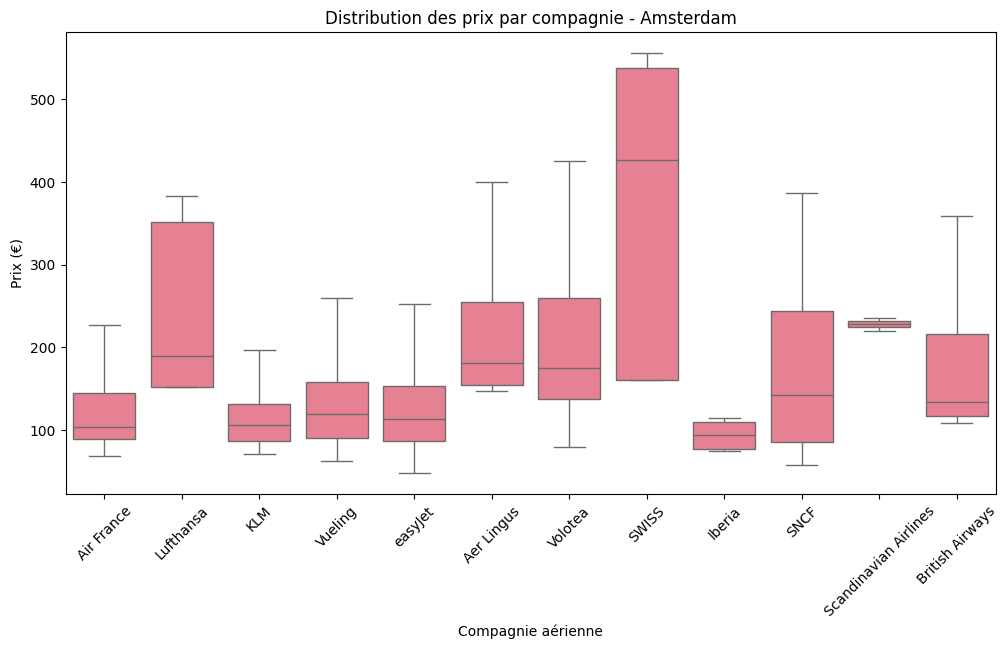

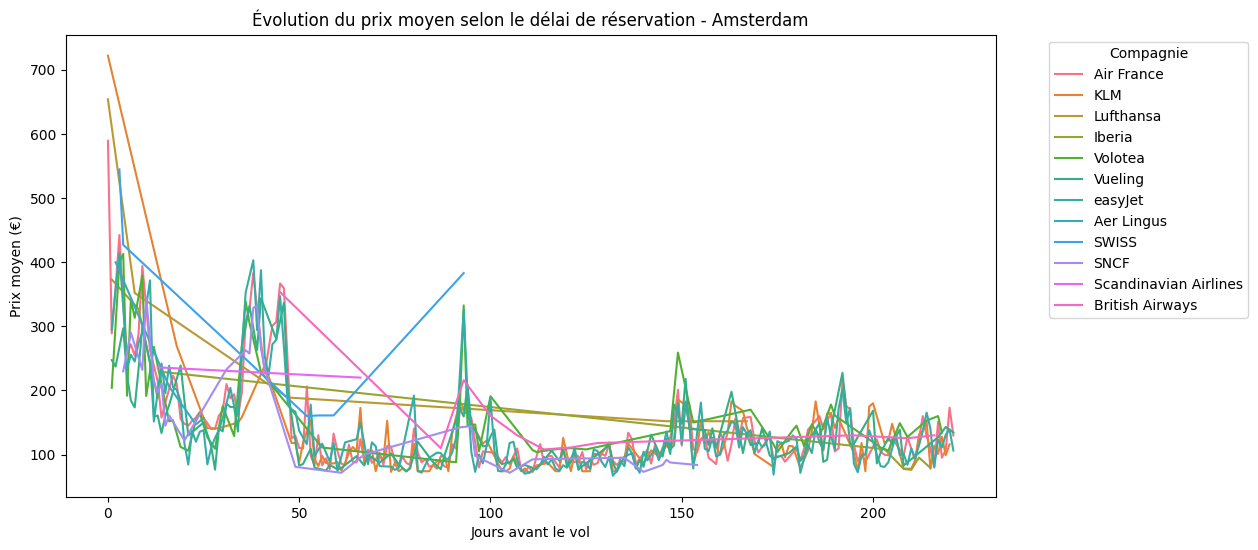

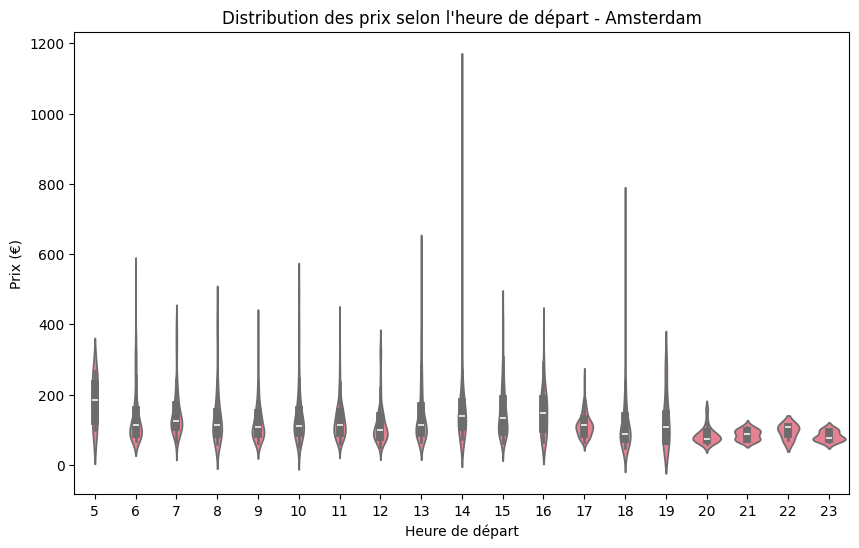

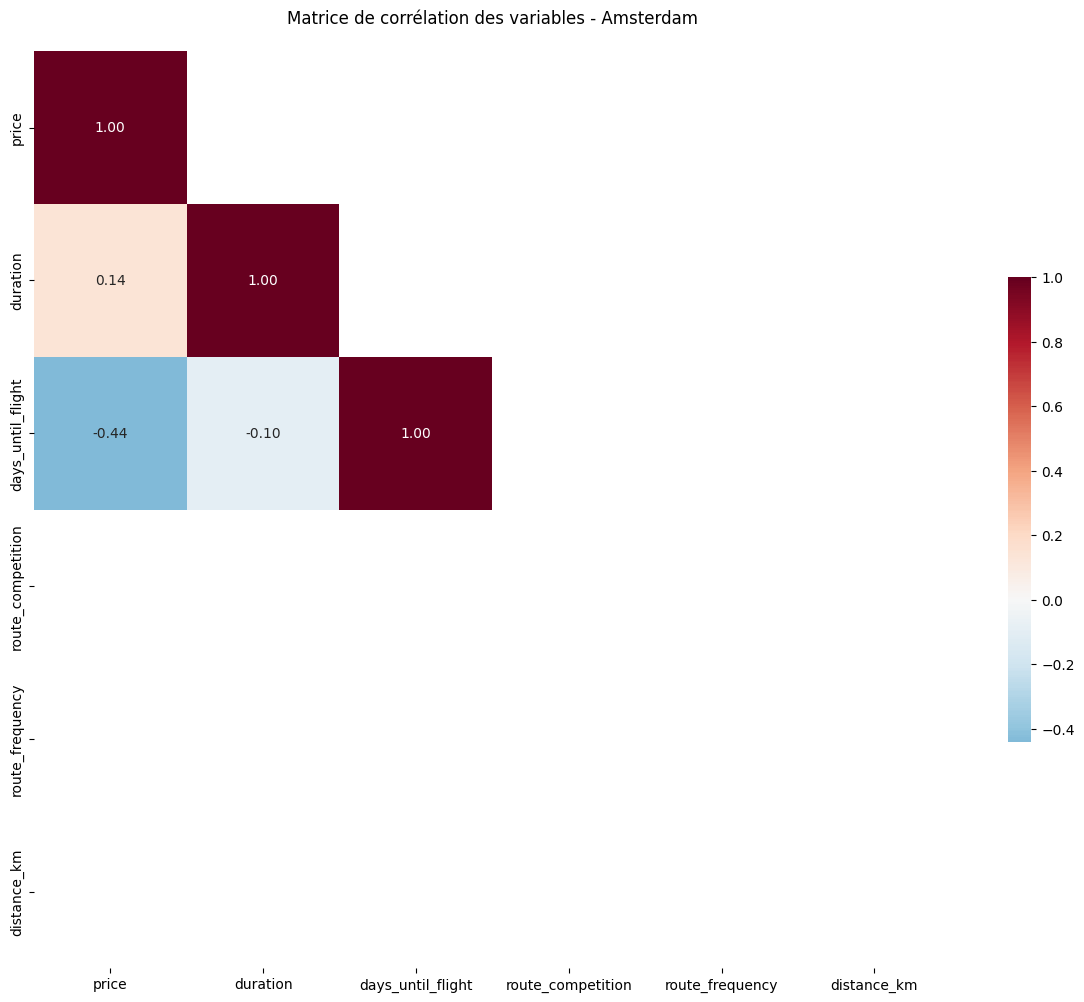

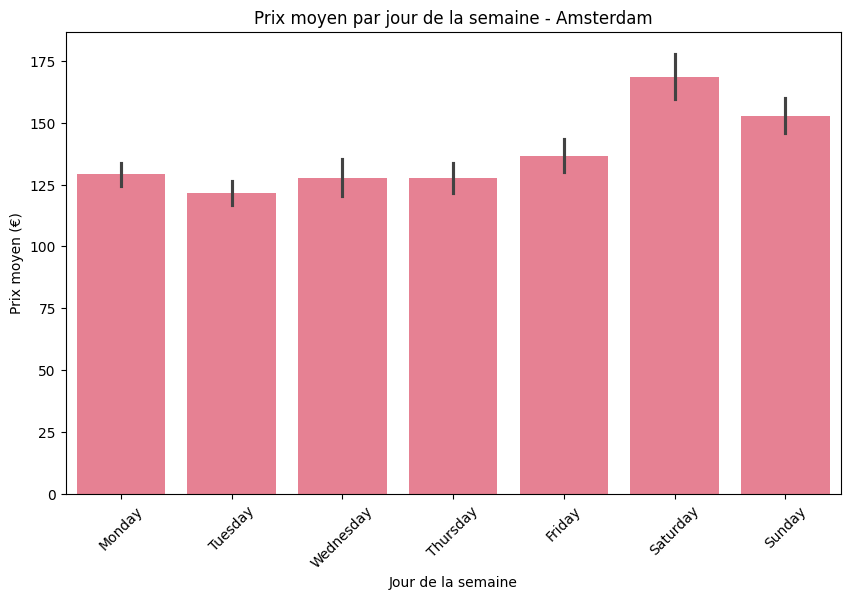

ValueError: List of boxplot statistics and `positions` values must have same the length

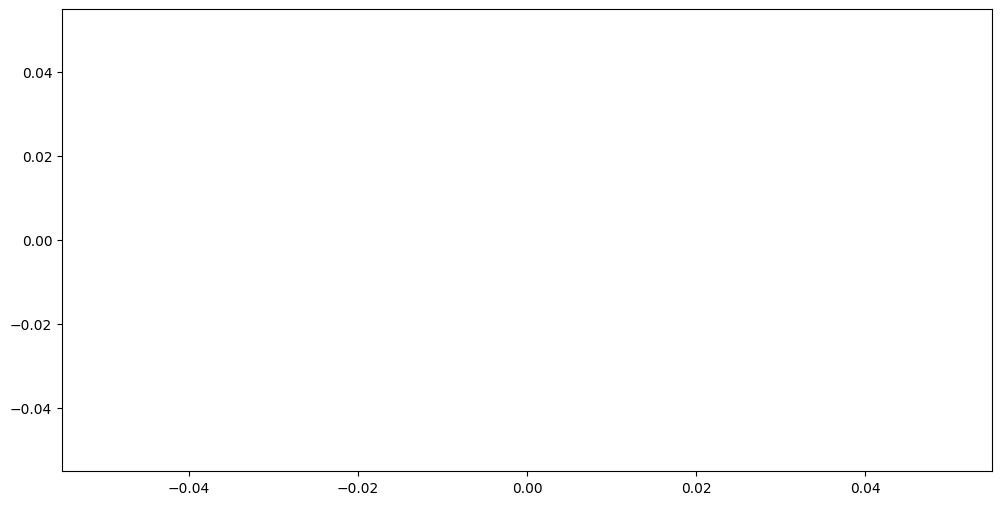

In [7]:
import sys
sys.path.append('..')
from src.data.feature_builder import FlightFeatureBuilder

import pandas as pd
import numpy as np  # Ajout de l'import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Initialisation
data_path = Path('../data')
feature_builder = FlightFeatureBuilder(data_path)

# Configuration du style de visualisation
sns.set_palette("husl")

# Chargement et préparation des données
df_ams = feature_builder.process_destination('AMS')

# 1. Analyse statistique des prix
print("Statistiques descriptives des prix par compagnie:")
stats_df = df_ams.groupby('airlines')['price'].describe()
print(stats_df.round(2))

# 2. Distribution des prix par compagnie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ams, x='airlines', y='price', showfliers=False)
plt.xticks(rotation=45)
plt.title('Distribution des prix par compagnie - Amsterdam')
plt.ylabel('Prix (€)')
plt.xlabel('Compagnie aérienne')
plt.show()

# 3. Évolution temporelle des prix moyens
plt.figure(figsize=(12, 6))
df_ams_avg = df_ams.groupby(['days_until_flight', 'airlines'])['price'].mean().reset_index()
sns.lineplot(data=df_ams_avg, x='days_until_flight', y='price', hue='airlines')
plt.title('Évolution du prix moyen selon le délai de réservation - Amsterdam')
plt.xlabel('Jours avant le vol')
plt.ylabel('Prix moyen (€)')
plt.legend(title='Compagnie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Distribution des prix selon la période de la journée
plt.figure(figsize=(10, 6))
# Extraction de l'heure à partir du format HH:MM
df_ams['hour'] = df_ams['departure_time'].str.split(':').str[0].astype(int)
sns.violinplot(data=df_ams, x='hour', y='price')
plt.title('Distribution des prix selon l\'heure de départ - Amsterdam')
plt.xlabel('Heure de départ')
plt.ylabel('Prix (€)')
plt.show()

# 5. Analyse des corrélations avec heatmap améliorée
correlation_vars = ['price', 'duration', 'days_until_flight', 
                   'route_competition', 'route_frequency', 'distance_km']  # Ajout de distance_km
correlation_matrix = df_ams[correlation_vars].corr()

plt.figure(figsize=(12, 10))  # Taille augmentée
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r',  # Changement de palette de couleurs
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .5},
            annot_kws={"size": 10})  # Taille des annotations augmentée
plt.title('Matrice de corrélation des variables - Amsterdam', pad=20)
plt.tight_layout()
plt.show()

# 6. Prix moyen par jour de la semaine
plt.figure(figsize=(10, 6))
# Utilisation de la colonne flight_date pour obtenir le jour de la semaine
df_ams['weekday'] = pd.to_datetime(df_ams['flight_date']).dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df_ams, x='weekday', y='price', order=weekday_order)
plt.title('Prix moyen par jour de la semaine - Amsterdam')
plt.xticks(rotation=45)
plt.xlabel('Jour de la semaine')
plt.ylabel('Prix moyen (€)')
plt.show()

# 7. Analyse des prix en fonction du type de bagage (version alternative)
plt.figure(figsize=(12, 6))
# Version simplifiée sans hue
sns.boxplot(data=df_ams, x='checked_baggage', y='price')
plt.title('Distribution des prix selon le type de bagage')
plt.xlabel('Bagage en soute')
plt.ylabel('Prix (€)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Alternative avec deux graphiques séparés
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Prix moyen par type de bagage
sns.barplot(data=df_ams, x='checked_baggage', y='price', ax=ax1)
ax1.set_title('Prix moyen par type de bagage')
ax1.set_xlabel('Bagage en soute')
ax1.set_ylabel('Prix moyen (€)')

# Prix moyen par compagnie
sns.barplot(data=df_ams, x='airlines', y='price', ax=ax2)
ax2.set_title('Prix moyen par compagnie')
ax2.set_xlabel('Compagnie')
ax2.set_ylabel('Prix moyen (€)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 8. Impact des escales sur les prix
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ams, x='is_direct', y='price')
plt.title('Comparaison des prix : Vols directs vs avec escales')
plt.xlabel('Vol direct')
plt.ylabel('Prix (€)')
plt.show()

# 9. Analyse des prix par classe tarifaire
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_ams, x='fare_class', y='price')
plt.title('Distribution des prix par classe tarifaire')
plt.xlabel('Classe tarifaire')
plt.ylabel('Prix (€)')
plt.xticks(rotation=45)
plt.show()

# 10. Relation entre durée et prix avec distinction vols directs/avec escales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ams, x='duration', y='price', hue='is_direct', alpha=0.6)
plt.title('Relation entre durée et prix selon le type de vol')
plt.xlabel('Durée (minutes)')
plt.ylabel('Prix (€)')
plt.show()

# 11. Analyse temporelle avancée
df_ams['month'] = pd.to_datetime(df_ams['flight_date'], format='%Y-%m-%d').dt.month
df_ams['search_month'] = pd.to_datetime(df_ams['search_date'], format='%Y-%m-%d').dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ams, x='month', y='price')
plt.title('Distribution des prix par mois de départ')
plt.xlabel('Mois de départ')
plt.ylabel('Prix (€)')
plt.show()

# 12. Analyse des durées d'escale
escales_df = df_ams[df_ams['layover_duration'].notna()]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=escales_df, x='layover_duration', y='price', hue='layover_airport')
plt.title('Impact de la durée d\'escale sur les prix')
plt.xlabel('Durée d\'escale (minutes)')
plt.ylabel('Prix (€)')
plt.legend(title='Aéroport d\'escale', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()